In [13]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
from modelfunc import save_model

In [ ]:
np.random.seed(123)

In [2]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
tf.get_logger().setLevel('ERROR')

#### Image Parameters

In [3]:
# With image dimensions 5184 x 5184 we run into oom error
batch_size = 32
img_height = 256
img_width = 256
img_channels = 3

In [4]:
train_split_test_dir='../0. Project Data/Reshaped zero-padded and split data'

In [5]:
train_ds = image_dataset_from_directory(
    train_split_test_dir + '/train',
    image_size=(img_width, img_height),
    batch_size=batch_size)
val_ds = image_dataset_from_directory(
    train_split_test_dir + '/val',
    image_size=(img_width, img_height),
    batch_size=batch_size)
test_ds = image_dataset_from_directory(
    train_split_test_dir + '/test',
    image_size=(img_width, img_height),
    batch_size=batch_size)

Found 2678 files belonging to 4 classes.
Found 667 files belonging to 4 classes.
Found 843 files belonging to 4 classes.


In [6]:
# enginerring more data by applying randomized horizontal flips, zooms(+/- 20%), and rotates (+/- 10%)
data_augmentation = keras.Sequential([layers.RandomFlip('horizontal'), layers.RandomRotation(0.1), layers.RandomZoom(0.2),])

In [7]:
inputs = keras.Input(shape=(img_height, img_width, img_channels))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                             

In [9]:
model.compile(optimizer='sgd', # Common optimizers include 'adam', 'sgd', and 'rmsprop'.
 loss='sparse_categorical_crossentropy', # Common loss functions include 'binary_crossentropy', 'categorical_crossentropy', and 'mse'.
 metrics=["accuracy"]) #Common metrics include 'accuracy', 'precision', 'recall', and 'f1_score'.

In [10]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)

Epoch 1/100
84/84 [==============================] - 25s 260ms/step - loss: 1.3347 - accuracy: 0.3921 - val_loss: 1.2882 - val_accuracy: 0.4423
Epoch 2/100
84/84 [==============================] - 20s 235ms/step - loss: 1.2256 - accuracy: 0.4802 - val_loss: 0.9965 - val_accuracy: 0.7121
Epoch 3/100
84/84 [==============================] - 20s 238ms/step - loss: 1.1342 - accuracy: 0.5534 - val_loss: 0.9069 - val_accuracy: 0.7196
Epoch 4/100
84/84 [==============================] - 20s 238ms/step - loss: 0.9923 - accuracy: 0.6221 - val_loss: 0.9960 - val_accuracy: 0.5742
Epoch 5/100
84/84 [==============================] - 20s 237ms/step - loss: 0.8740 - accuracy: 0.6680 - val_loss: 0.6598 - val_accuracy: 0.7496
Epoch 6/100
84/84 [==============================] - 20s 238ms/step - loss: 0.7465 - accuracy: 0.7091 - val_loss: 0.6302 - val_accuracy: 0.7556
Epoch 7/100
84/84 [==============================] - 20s 237ms/step - loss: 0.7722 - accuracy: 0.7031 - val_loss: 0.6380 - val_accuracy:

Epoch 41/100
84/84 [==============================] - 20s 238ms/step - loss: 0.3056 - accuracy: 0.8872 - val_loss: 0.2710 - val_accuracy: 0.8906
Epoch 42/100
84/84 [==============================] - 20s 235ms/step - loss: 0.2792 - accuracy: 0.8906 - val_loss: 0.2546 - val_accuracy: 0.9010
Epoch 43/100
84/84 [==============================] - 19s 225ms/step - loss: 0.2736 - accuracy: 0.8973 - val_loss: 0.2794 - val_accuracy: 0.9025
Epoch 44/100
84/84 [==============================] - 19s 224ms/step - loss: 0.2850 - accuracy: 0.8932 - val_loss: 0.2558 - val_accuracy: 0.9025
Epoch 45/100
84/84 [==============================] - 19s 222ms/step - loss: 0.3536 - accuracy: 0.8779 - val_loss: 0.2935 - val_accuracy: 0.8996
Epoch 46/100
84/84 [==============================] - 19s 223ms/step - loss: 0.2858 - accuracy: 0.8880 - val_loss: 0.2400 - val_accuracy: 0.9115
Epoch 47/100
84/84 [==============================] - 19s 226ms/step - loss: 0.2693 - accuracy: 0.8936 - val_loss: 0.2447 - val_ac

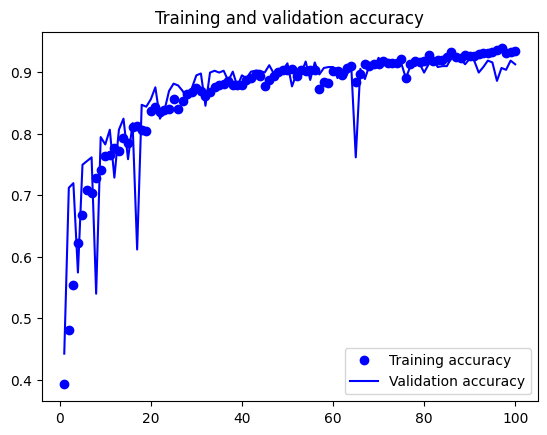

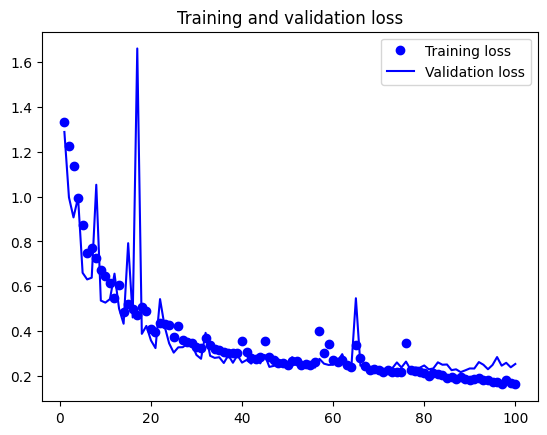

In [11]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [14]:
save_path = '../3. Model Selection/saved_models/Zero-padded Data Model/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
save_model(model, save_path)

INFO:tensorflow:Assets written to: ./saved_models/Reshaped zero-padded Data Model\assets


INFO:tensorflow:Assets written to: ./saved_models/Reshaped zero-padded Data Model\assets
